In [3]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


from pathlib import Path

In [4]:
# List of tickers
tickers = ['AMZN', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
AMZN:501,
 VALE:522,
 AAPL:493 


In [5]:
Apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,AAPL
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,AAPL
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,AAPL
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,AAPL
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,AAPL


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '2023-07-28'),
  Text(0.0, 0, '2022-01-03'),
  Text(100.0, 0, '2022-05-26'),
  Text(200.0, 0, '2022-10-19'),
  Text(300.0, 0, '2023-03-15'),
  Text(400.0, 0, '2023-08-08'),
  Text(500.0, 0, ''),
  Text(600.0, 0, '')])

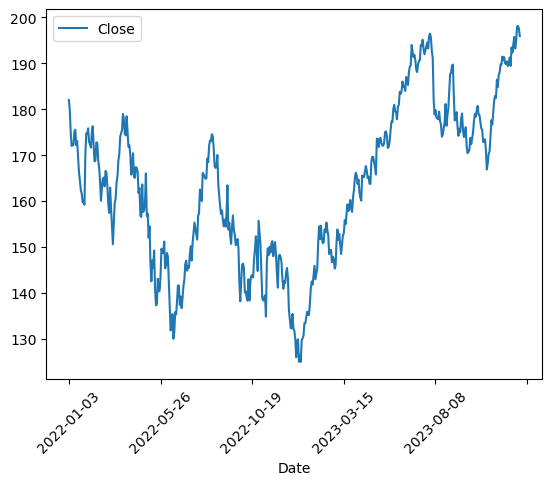

In [6]:
Apple_stock.plot(x="Date", y = "Close")
plt.xticks(rotation=45)

In [7]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

In [8]:
# Exclude the last 10 rows from the dataset
X = Apple_stock[['Open', 'High', 'Low', 'Volume']][:-10]
y = Apple_stock['Close'][:-10]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [10]:
# Define the desired hyperparameters
# For example:
n_estimators = 110  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
min_samples_split = 2  # Minimum number of samples required to split an internal node
min_samples_leaf = 1   # Minimum number of samples required to be at a leaf node
max_features = 'auto'  # Number of features to consider when looking for the best split (default is 'auto', which uses all features)


In [11]:
# Create the Random Forest model with specified hyperparameters
model = RandomForestRegressor(n_estimators=n_estimators, 
                               max_depth=max_depth, 
                               min_samples_split=min_samples_split, 
                               min_samples_leaf=min_samples_leaf, 
                               max_features=max_features)

In [12]:
#Train the model
model.fit(X_train, y_train) #Training the model

C:\Users\mklut\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', n_estimators=110)

In [13]:
#Test the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Training set score:', train_score)
print('Testing set score:', test_score)

Training set score: 0.998889610848564
Testing set score: 0.9932070447805279


In [31]:
# Loading the Stock Prices for Jan-2024
AAPL_ticker_test = Path("../Resources/AAPL_Test.csv")
AAPL_stock_Test = pd.read_csv(AAPL_ticker_test)
AAPL_stock_Test["Ticker"]= "AAPL_Test"  

AAPL_stock_Test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
24,2024-01-25,195.220001,196.270004,193.110001,194.169998,194.169998,54822100,AAPL_Test
25,2024-01-26,194.270004,194.759995,191.940002,192.419998,192.419998,44594000,AAPL_Test
26,2024-01-29,192.009995,192.199997,189.580002,191.729996,191.729996,47145600,AAPL_Test
27,2024-01-30,190.940002,191.800003,187.470001,188.039993,188.039993,55859400,AAPL_Test
28,2024-01-31,187.039993,187.100006,184.350006,184.399994,184.399994,55396700,AAPL_Test


In [35]:
#Make the prediction
new_data = AAPL_stock_Test[['Open', 'High', 'Low', 'Volume']] #Only want last 10 days
prediction = model.predict(new_data)
print('The model predicts the last 10 days to be:', prediction)
print('Actual value is:', AAPL_stock_Test['Close'])

The model predicts the last 10 days to be: [193.81009134 194.06572835 193.95590989 193.6038179  193.50145255
 191.9086357  193.77427119 193.15472585 186.67108822 185.66045214
 182.33436256 182.1485428  183.56490812 183.87509279 185.78536098
 185.77299893 185.916089   183.22399773 182.50899739 187.61008776
 189.75900198 193.10545525 193.75990921 193.98063718 193.76591038
 193.04572733 190.94327054 189.90681794 186.09527017]
Actual value is: 0     196.940002
1     194.830002
2     194.679993
3     193.600006
4     193.050003
5     193.149994
6     193.580002
7     192.529999
8     185.639999
9     184.250000
10    181.910004
11    181.179993
12    185.559998
13    185.139999
14    186.190002
15    185.589996
16    185.919998
17    183.630005
18    182.679993
19    188.630005
20    191.559998
21    193.889999
22    195.179993
23    194.500000
24    194.169998
25    192.419998
26    191.729996
27    188.039993
28    184.399994
Name: Close, dtype: float64


In [14]:
#Make the prediction
new_data = Apple_stock[['Open', 'High', 'Low', 'Volume']].tail(10) #Only want last 10 days
prediction = model.predict(new_data)
print('The model predicts the last 10 days to be:', prediction)
print('Actual value is:', Apple_stock[['Close']].tail(10))

The model predicts the last 10 days to be: [191.72372612 193.0328181  193.80909037 193.96227323 192.17681806
 193.53645442 194.36200268 194.22472964 194.36200268 194.01309193]
Actual value is:           Close
483  193.419998
484  192.320007
485  194.270004
486  195.710007
487  193.179993
488  194.710007
489  197.960007
490  198.110001
491  197.570007
492  195.889999


In [15]:
last_10_days = Apple_stock.tail(10)
last_10_days


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
483,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400,AAPL
484,2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700,AAPL
485,2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700,AAPL
486,2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300,AAPL
487,2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700,AAPL
488,2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900,AAPL
489,2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200,AAPL
490,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600,AAPL
491,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700,AAPL
492,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,AAPL


In [16]:
prediction

array([191.72372612, 193.0328181 , 193.80909037, 193.96227323,
       192.17681806, 193.53645442, 194.36200268, 194.22472964,
       194.36200268, 194.01309193])

In [17]:
last_10_days

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
483,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400,AAPL
484,2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700,AAPL
485,2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700,AAPL
486,2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300,AAPL
487,2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700,AAPL
488,2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900,AAPL
489,2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200,AAPL
490,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600,AAPL
491,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700,AAPL
492,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900,AAPL


In [23]:
predicted_last_10_days

array([191.72372612, 193.0328181 , 193.80909037, 193.96227323,
       192.17681806, 193.53645442, 194.36200268, 194.22472964,
       194.36200268, 194.01309193])

In [18]:
# Make predictions for the last 10 days
predicted_last_10_days = model.predict(last_10_days[['Open', 'High', 'Low', 'Volume']])

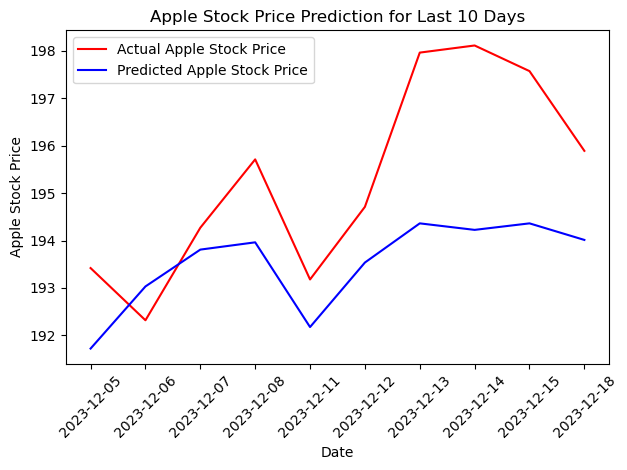

In [28]:
# Extract the "Date" column from last_10_days
dates = last_10_days['Date']

# Plot actual stock price for the last 10 days
plt.plot(dates, last_10_days['Close'], color='red', label="Actual Apple Stock Price")

# Plot predicted stock price for the last 10 days
plt.plot(dates, predicted_last_10_days, color='blue', label="Predicted Apple Stock Price")

# Add title and labels
plt.title('Apple Stock Price Prediction for Last 10 Days')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
# Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [22]:
# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print('Mean Squared Error on training set:', train_mse)
print('Root Mean Squared Error on testing set:', test_mse)

Mean Squared Error on training set: 0.30854379132499693
Root Mean Squared Error on testing set: 1.9761592357018862
